# ------------------------------ Amazon Product Review Analysis--------------------------------

# Problem Statement

## Thomas, a global market analyst, wishes to develop an automated system to analyze and monitor an enormous number of reviews. By monitoring the entire review history of products, he wishes to analyze tone, language, keywords, and trends over time to provide valuable insights that increase the success rate of existing and new products and marketing campaigns.

### IMPORTING  LIBRARIES

In [1]:
import pandas as pd           ##importing the pandas library
import json                    #import json for json file
import gzip                     #import gzip for zip file
import numpy as np               ##importing the pandas library
import datetime as dt
import matplotlib.pyplot as plt   #importing the library for visualisatrion
import warnings                                                  #To avoid the shown warnings
warnings.filterwarnings("ignore")

### Load Data

In [2]:
reviews = pd.read_json('Magazine_Subscriptions.json.gz', lines=True)
metadata = pd.read_json('meta_Magazine_Subscriptions.json.gz', lines=True)

In [3]:
reviews.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [4]:
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Magazine Subscriptions, Professional & Educat...",,[REASON is edited for people interested in eco...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYLE, B01MCU84LB, B000UHI2LW, B01AKS14A...",,Reason Magazine,[],[],"[B002PXVYLE, B000UHI2LW, B01MCU84LB, B002PXW18...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,B00005N7NQ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,"[Magazine Subscriptions, Arts, Music &amp; Pho...",,[Written by and for musicians. Covers a variet...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYGE, B0054LRNC8, B000BVEELE, B00006KC3...",,String Letter Publishers,[],742 in Magazine Subscriptions (,"[B002PXVYGE, B0054LRNC8, B00006L16A, 171906487...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,B00005N7OC,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Magazine Subscriptions, Fashion &amp; Style, ...",,[Allure is the beauty expert. Every issue is f...,,"<span class=""a-size-medium a-color-secondary""","[B001THPA4O, B002PXVZWW, B001THPA1M, B001THPA1...",,Conde Nast Publications,[],[],"[B002PXVZWW, B001THPA4O, B001THPA1M, B01N819UD...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,B00005N7OD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Magazine Subscriptions, Sports, Recreation & ...",,[FLIGHT JOURNAL includes articles on aviation ...,,"<span class=""a-size-medium a-color-secondary""","[B07JVF7QW4, B00ATQ6FPY, B002G551F6, B00008CGW...",,AirAge Publishing,[],[],"[B002G551F6, B00ATQ6FPY, B00005N7PT, B001THPA2...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,B00005N7O9,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Magazine Subscriptions, Professional & Educat...",,[RIDER is published for the road and street ri...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYD2, B01BM7TOU6, B000060MKJ, B000BNNIG...",,EPG Media & Specialty Information,[],[],"[B01BM7TOU6, B000060MKJ, B002PXVYD2, B000BNNIG...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,B00005N7O6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


- Shape of review data
-  Columns of review data
- Statistical evualtion of the review data
- Data type of review data


In [5]:
print('Shape of review data:\n',reviews.shape)
print('\n')
print('#'*100,'\n')
print('Columns of review data:\n ',reviews.columns)
print('\n')
print('#'*100,'\n')
print('Statistical evualtion of the review data:\n',reviews.describe())
print('\n')
print('#'*100,'\n')
print('Data type of review data:\n',reviews.dtypes)

Shape of review data:
 (89689, 12)


#################################################################################################### 

Columns of review data:
  Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'style',
       'image'],
      dtype='object')


#################################################################################################### 

Statistical evualtion of the review data:
             overall  unixReviewTime
count  89689.000000    8.968900e+04
mean       4.036638    1.389447e+09
std        1.419791    1.039430e+08
min        1.000000    1.004054e+09
25%        3.000000    1.355184e+09
50%        5.000000    1.414109e+09
75%        5.000000    1.461542e+09
max        5.000000    1.537315e+09


#################################################################################################### 

Data type of review data:
 overall            int64
vote             

In [6]:
metadata.shape

(3385, 19)

- Shape of meta data
- Columns of meta data
- Statistical evualtion of the meta data
- Data type of meta data

In [7]:
print('Shape of meta data:\n',metadata.shape)
print('\n')
print('#'*100,'\n')
print('Columns of meta data:\n ',metadata.columns)
print('\n')
print('#'*100,'\n')
print('Statistical evualtion of the meta data:\n',metadata.describe())
print('\n')
print('#'*100,'\n')
print('Data type of meta data:\n',metadata.dtypes)

Shape of meta data:
 (3385, 19)


#################################################################################################### 

Columns of meta data:
  Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')


#################################################################################################### 

Statistical evualtion of the meta data:
        category tech1 description   fit  \
count      3385  3385        3385  3385   
unique      298     1        1668     1   
top          []                []         
freq        502  3385         475  3385   

                                                title also_buy tech2  \
count                                            3385     3385  3385   
unique                                            149     1047     1   
top     

## Merging both the datasets of review and metadata for  analysis

In [8]:
magzine = pd.merge(reviews,metadata,on='asin')

In [9]:
magzine.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,...,[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,...,[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,...,[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,5,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,...,[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,5,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,...,[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,NaT,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


- Shape of merge data(magzine)
- Columns of merge data(magzine)
- Data type of merge data(magzine)

In [10]:
print('Shape of merge data:\n',magzine.shape)
print('\n')
print('#'*100,'\n')
print('Columns of merge data:\n ',magzine.columns)
print('\n')
print('#'*100,'\n')
print('Data type of merge data:\n',magzine.info())

Shape of merge data:
 (135793, 30)


#################################################################################################### 

Columns of merge data:
  Index(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'style',
       'image', 'category', 'tech1', 'description', 'fit', 'title', 'also_buy',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'imageURL', 'imageURLHighRes'],
      dtype='object')


#################################################################################################### 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135793 entries, 0 to 135792
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   overall          135793 non-null  int64         
 1   vote             37019 non-null   object        


In [11]:
magzine_c=magzine.copy()

### Checking for missing values in our merged data (beauty).

In [12]:
magzine_c.isnull().sum()

overall                 0
vote                98774
verified                0
reviewTime              0
reviewerID              0
asin                    0
reviewerName            4
reviewText             47
summary                33
unixReviewTime          0
style               50053
image              135586
category                0
tech1                   0
description             0
fit                     0
title                   0
also_buy                0
tech2                   0
brand                   0
feature                 0
rank                    0
also_view               0
details                 0
main_cat                0
similar_item            0
date               135793
price                   0
imageURL                0
imageURLHighRes         0
dtype: int64

## Percentage of null values.

In [13]:
magzine_c.isnull().sum()/len(magzine)*100

overall              0.000000
vote                72.738654
verified             0.000000
reviewTime           0.000000
reviewerID           0.000000
asin                 0.000000
reviewerName         0.002946
reviewText           0.034612
summary              0.024302
unixReviewTime       0.000000
style               36.859779
image               99.847562
category             0.000000
tech1                0.000000
description          0.000000
fit                  0.000000
title                0.000000
also_buy             0.000000
tech2                0.000000
brand                0.000000
feature              0.000000
rank                 0.000000
also_view            0.000000
details              0.000000
main_cat             0.000000
similar_item         0.000000
date               100.000000
price                0.000000
imageURL             0.000000
imageURLHighRes      0.000000
dtype: float64

### Looking at the percentage of null values in the columns:- vote, image has high % of null value so i removed this columns from our merge data(magzine)

In [14]:
magzine_c.drop(['image','vote','date'],axis=1 ,inplace=True)

In [15]:
magzine_c.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,...,brand,feature,rank,also_view,details,main_cat,similar_item,price,imageURL,imageURLHighRes
0,5,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,...,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,...,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,5,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,...,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,5,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,...,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,5,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,...,"Future US, Inc.",[],[],"[B078Y58XM8, B07K45HS6Q, B000AMXXF2, B07FMVJT1...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [16]:
magzine_c.shape

(135793, 27)

### Drop null value

In [17]:
magzine_c = magzine_c.dropna()

In [18]:
magzine_c.shape

(85684, 27)

In [19]:
print('Old data shape:\n',magzine.shape)
print('#'*100)
print('New data shape:\n',magzine_c.shape)

Old data shape:
 (135793, 30)
####################################################################################################
New data shape:
 (85684, 27)


### Cheack Null value

In [20]:
magzine_c.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       0
reviewText         0
summary            0
unixReviewTime     0
style              0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

### No missing value left

# Drop irrelevant columns

### What Is  Unix Time?

#### Unix time is a count of total seconds since a fixed time and date. It’s a date/time (or timestamp) format that looks different from the human-readable dates and times we’re used to. This is purely for efficiency reasons. It takes a lot less space to store a single number representing seconds than it does to store separate values for the year, month, hour, etc.

In [21]:
magzine_c.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'style',
       'category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'price', 'imageURL', 'imageURLHighRes'],
      dtype='object')

In [22]:
cols = ['fit', 'tech2','tech1', 'feature', 'details','imageURL', 'imageURLHighRes','unixReviewTime','description', 'similar_item',]

for i in cols:
    magzine_c.drop([i],axis=1,inplace=True)

In [23]:
print('New data shape after drop some irrelevant:\n',magzine_c.shape)

New data shape after drop some irrelevant:
 (85684, 17)


In [24]:
print('Columns of New data:\n ',magzine_c.columns)

Columns of New data:
  Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'style', 'category', 'title',
       'also_buy', 'brand', 'rank', 'also_view', 'main_cat', 'price'],
      dtype='object')


In [26]:
magzine_c.reset_index(drop=True,inplace=True)
magzine_c.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,category,title,also_buy,brand,rank,also_view,main_cat,price
0,3,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",{'Format:': ' Print Magazine'},"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,406 in Magazine Subscriptions (,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,


### Reformat date time from raw form

In [27]:
magzine_c["reviewTime"] = pd.to_datetime(magzine_c["reviewTime"])

In [28]:
magzine_c.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,category,title,also_buy,brand,rank,also_view,main_cat,price
0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",{'Format:': ' Print Magazine'},"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,406 in Magazine Subscriptions (,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,


In [29]:
magzine_c.shape

(85684, 17)

### Check Duplicate value

In [31]:
#find duplicate rows across  columns
magzine_c.duplicated(['asin','reviewText','reviewerName','reviewerID']).sum()

37116

In [32]:
magzine_c.drop_duplicates(subset=['asin','reviewText','reviewerName','reviewerID'], keep='first',inplace=True)


In [33]:
#find duplicate rows across  columns
magzine_c.duplicated(['asin','reviewText','reviewerName','reviewerID']).sum()

0

In [34]:
print('New data shape after drop duplicate value:\n',magzine_c.shape)

New data shape after drop duplicate value:
 (48568, 17)


## clean rank columns

In [35]:
magzine_c[['rank']]

,rank
0,406 in Magazine Subscriptions (
2,406 in Magazine Subscriptions (
4,406 in Magazine Subscriptions (
6,406 in Magazine Subscriptions (
8,406 in Magazine Subscriptions (
...,...
85679,900 in Magazine Subscriptions (
85680,244 in Magazine Subscriptions (
85681,244 in Magazine Subscriptions (
85682,244 in Magazine Subscriptions (


In [36]:
#for column 'rank' 
#remove uneccessary symbol like comma ',' and words
#convert the string into integer 
magzine_c['rank'].replace(',','', regex=True, inplace=True)
magzine_c['rank'] = magzine_c['rank'].str.extract('(\d+)')

In [37]:
magzine_c[['rank']]

,rank
0,406
2,406
4,406
6,406
8,406
...,...
85679,900
85680,244
85681,244
85682,244


### Clean Price Columns

In [46]:
magzine_c[['price']]

,price
0,
2,
4,
6,
8,
...,...
85679,
85680,
85681,
85682,


In [47]:
print("Number of reviews having empty string :",magzine_c[magzine_c['price']==''].shape[0])

Number of reviews having empty string : 48563


## We can see that columns 'price'  are empty so drop the columns

In [48]:
magzine_c.drop('price',axis=1,inplace=True)

In [49]:
magzine_c.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'style', 'category', 'title',
       'also_buy', 'brand', 'rank', 'also_view', 'main_cat'],
      dtype='object')

In [52]:
magzine_c.shape

(48568, 16)

In [53]:
magzine_c.isnull().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName        0
reviewText          0
summary             0
style               0
category            0
title               0
also_buy            0
brand               0
rank            40283
also_view           0
main_cat            0
dtype: int64

### Percentage of null values

In [54]:
magzine_c.isnull().sum()/len(magzine_c)*100

overall          0.000000
verified         0.000000
reviewTime       0.000000
reviewerID       0.000000
asin             0.000000
reviewerName     0.000000
reviewText       0.000000
summary          0.000000
style            0.000000
category         0.000000
title            0.000000
also_buy         0.000000
brand            0.000000
rank            82.941443
also_view        0.000000
main_cat         0.000000
dtype: float64

## 'rank columns' have 83% null so i drop the columns

In [55]:
magzine_c.drop('rank',axis=1,inplace=True)

In [56]:
magzine_c.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    0
reviewText      0
summary         0
style           0
category        0
title           0
also_buy        0
brand           0
also_view       0
main_cat        0
dtype: int64

In [57]:
magzine_c.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,category,title,also_buy,brand,also_view,main_cat
0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",{'Format:': ' Print Magazine'},"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
2,5,False,2006-11-10,A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,{'Format:': ' Print Magazine'},"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
4,5,True,2015-08-23,A2T0GO5G3JJ66V,B00005N7OJ,Helen C. Kuzmier,"This magazine is always a ""work of art""....gre...",A Gem!,{'Format:': ' Print Magazine'},"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
6,3,True,2015-03-10,A1CEG4HICKGHUW,B00005N7OJ,Cliffton K. Bryner,it's ok !!!,Three Stars,{'Format:': ' Print Magazine'},"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
8,3,True,2015-01-04,AJW4UJUSJVKJA,B00005N7OJ,Christine Moran,Nice to look at but was way too high-brow for ...,For collectors of very fine antiques,{'Format:': ' Print Magazine'},"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions


In [58]:
magzine_c.shape

(48568, 15)

In [59]:
print('Data type of merge data:\n',magzine_c.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48568 entries, 0 to 85683
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   overall       48568 non-null  int64         
 1   verified      48568 non-null  bool          
 2   reviewTime    48568 non-null  datetime64[ns]
 3   reviewerID    48568 non-null  object        
 4   asin          48568 non-null  object        
 5   reviewerName  48568 non-null  object        
 6   reviewText    48568 non-null  object        
 7   summary       48568 non-null  object        
 8   style         48568 non-null  object        
 9   category      48568 non-null  object        
 10  title         48568 non-null  object        
 11  also_buy      48568 non-null  object        
 12  brand         48568 non-null  object        
 13  also_view     48568 non-null  object        
 14  main_cat      48568 non-null  object        
dtypes: bool(1), datetime64[ns](1), int64

### Cleaning the style columns

In [61]:
magzine_c[['style']]

,style
0,{'Format:': ' Print Magazine'}
2,{'Format:': ' Print Magazine'}
4,{'Format:': ' Print Magazine'}
6,{'Format:': ' Print Magazine'}
8,{'Format:': ' Print Magazine'}
...,...
85679,{'Format:': ' Print Magazine'}
85680,{'Format:': ' Print Magazine'}
85681,{'Format:': ' Kindle Edition'}
85682,{'Format:': ' Print Magazine'}


In [63]:
style= list(magzine_c['style'].items())
style

[(0, {'Format:': ' Print Magazine'}),
 (2, {'Format:': ' Print Magazine'}),
 (4, {'Format:': ' Print Magazine'}),
 (6, {'Format:': ' Print Magazine'}),
 (8, {'Format:': ' Print Magazine'}),
 (10, {'Format:': ' Print Magazine'}),
 (12, {'Format:': ' Print Magazine'}),
 (14, {'Format:': ' Print Magazine'}),
 (16, {'Format:': ' Print Magazine'}),
 (18, {'Format:': ' Print Magazine'}),
 (20, {'Format:': ' Print Magazine'}),
 (22, {'Format:': ' Print Magazine'}),
 (24, {'Format:': ' Print Magazine'}),
 (26, {'Format:': ' Print Magazine'}),
 (28, {'Format:': ' Print Magazine'}),
 (30, {'Format:': ' Print Magazine'}),
 (32, {'Format:': ' Print Magazine'}),
 (34, {'Format:': ' Print Magazine'}),
 (36, {'Format:': ' Print Magazine'}),
 (38, {'Format:': ' Print Magazine'}),
 (40, {'Format:': ' Print Magazine'}),
 (42, {'Format:': ' Print Magazine'}),
 (44, {'Format:': ' Print Magazine'}),
 (46, {'Format:': ' Print Magazine'}),
 (48, {'Format:': ' Print Magazine'}),
 (50, {'Format:': ' Print Maga

In [65]:
magzine_c['style'].replace("size",'', regex=True, inplace=True)
magzine_c['style'].replace([":","''"],'', regex=True, inplace=True)

In [66]:
# Define function to clean dictionary string
def clean_dict_string(s):
    # Remove leading/trailing whitespace and curly braces
    s = s.str.strip('{}').strip()
    return s

In [94]:
#beauty_c['style'] = beauty_c['style'].apply(lambda x: clean_dict_string(x))

### clean magzine_c['style'] columns

In [67]:
magzine_c['style'] = magzine_c['style'].apply(lambda x: json.dumps(x)[1:-1])

In [68]:
magzine_c['style'].replace(["Size","Color"],'', regex=True, inplace=True)
magzine_c['style'].replace([":","''"],'', regex=True, inplace=True)
magzine_c['style'].replace(r'[^a-zA-Z0-9\s]','', regex=True, inplace=True)

In [69]:
magzine_c['style'].replace(r'\s+', ' ', regex=True, inplace=True)

In [70]:
print(list(magzine_c['style']))

['Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Kindle Edition', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine', 'Format Print Magazine',

In [71]:
magzine_c['style'].value_counts()

Format Print Magazine    36659
Format Kindle Edition    11909
Name: style, dtype: int64

In [85]:
magzine_c['category'].value_counts()

[Magazine Subscriptions, Home & Garden, Design & Decoration]                                                                  3661
[Magazine Subscriptions, Cooking, Food & Wine, Recipes & Techniques]                                                          3278
[Magazine Subscriptions, Fashion & Style, Women]                                                                              2383
[Magazine Subscriptions, Home & Garden, How-to & Home Improvements]                                                           2304
[Magazine Subscriptions, Professional & Educational Journals, Professional & Trade, Humanities & Social Sciences, History]    2231
                                                                                                                              ... 
[Magazine Subscriptions, Sports, Recreation & Outdoors, Sports & Leisure, Mountaineering]                                        3
[Magazine Subscriptions, Crafts &amp; Hobbies, Models]                             

In [72]:
magzine_c.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,category,title,also_buy,brand,also_view,main_cat
0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
2,5,False,2006-11-10,A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
4,5,True,2015-08-23,A2T0GO5G3JJ66V,B00005N7OJ,Helen C. Kuzmier,"This magazine is always a ""work of art""....gre...",A Gem!,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
6,3,True,2015-03-10,A1CEG4HICKGHUW,B00005N7OJ,Cliffton K. Bryner,it's ok !!!,Three Stars,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
8,3,True,2015-01-04,AJW4UJUSJVKJA,B00005N7OJ,Christine Moran,Nice to look at but was way too high-brow for ...,For collectors of very fine antiques,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
10,5,True,2013-05-19,A1RJWTSJJ4NZ0O,B00005N7OJ,marky,Enjoying the magazine overall. Very nice trans...,Enjoying the articles,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
12,5,True,2013-03-20,AP9AAQLDUUXV,B00005N7OJ,Gwendo,I love Antiques magazine because it combines h...,antiques and art,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
14,3,True,2011-09-05,A29HLOUW0NS0EH,B00005N7OJ,Patricia R. Erwin,This magazine is a Christmas present to a rela...,Antique Magazine,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
16,5,True,2010-12-05,A37C5VST9KE80M,B00005N7OJ,T. E. Messie,If you really want to know what fine antiques ...,Fine Antiques magazine,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions
18,5,True,2008-12-20,A2J7L0U199A8D8,B00005N7OJ,Collecter,I have subscibed to Antiques for years. It is ...,Excellent magazine-excellent buy!,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B000

In [73]:
magzine_c.shape

(48568, 15)

### Combining(concatenating) review text and review summary columns

In [74]:
magzine_c['Review'] = magzine_c['reviewText'] +magzine_c['summary']

In [75]:
magzine_c = magzine_c.drop(['reviewText','summary'], axis=1)

In [76]:
magzine_c.shape

(48568, 14)

In [77]:
magzine_c.head(1)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,style,category,title,also_buy,brand,also_view,main_cat,Review
0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,Antiques Magazine is a publication made for an...


### Data cleaning and removing special characters

In [78]:
import re
import string

def clean_text(text):
    # remove any non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # convert all text to lower case
    text = text.lower()
    # remove any URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # remove any email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # remove any numbers, digits, and hyphens
    text = re.sub(r'[0-9\-]+', '', text)
    #: Removes any punctuation marks from the string.
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    #Removes any newline characters.
    text = re.sub('\n', '', text)
    # remove any extra white space
    text = re.sub(r'\s+', ' ', text)
    # remove leading and trailing white space
    text = text.strip()
    
    return text
    
  

In [79]:
magzine_c['Review'] = magzine_c['Review'].apply(lambda x:clean_text(x))

In [80]:
magzine_c[['Review']]

,Review
0,antiques magazine is a publication made for an...
2,this beautiful magazine is in itself a work of...
4,this magazine is always a work of artgreat pho...
6,its ok three stars
8,nice to look at but was way too highbrow for m...
...,...
85679,love these godly inspired thoughts and prayers...
85680,enjoyedfive stars
85681,although i really like my idea of what brad pi...
85682,as a designer myself i was constantly looking ...


In [81]:
magzine_c.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    0
style           0
category        0
title           0
also_buy        0
brand           0
also_view       0
main_cat        0
Review          0
dtype: int64

### Removing stop words

In [86]:
import spacy                                                  # Import spaCy library
from spacy.lang.en import English                             # Import specific model
nlp = spacy.load("en_core_web_sm")

In [87]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS                     # Importing stop words from English language.
print('Number of stop words: %d' % len(spacy_stopwords))

Number of stop words: 326


In [88]:
print(spacy_stopwords)

{'yours', 'never', 'whether', 'at', 'already', 'side', 'whence', "'re", 'beforehand', 'nor', 'only', 'cannot', 'last', 'below', 'themselves', 'always', 'fifteen', 'whereas', 'around', 'say', '‘ll', 'next', '’m', 'formerly', 'rather', 'somehow', 'a', 'few', 'another', 'ten', 'many', 'afterwards', 'see', 'whole', 'moreover', 'beyond', 'keep', 'forty', 'meanwhile', 'herself', 'otherwise', 'hence', 'we', 'without', 'yourselves', 'being', 'here', '‘s', 'seem', 'first', 're', 'by', 'hereupon', 'it', 'when', 'off', 'nine', 'front', "n't", 'back', 'onto', 'nevertheless', 'but', 'up', 'their', 'among', 'becoming', 'me', 'name', 'five', 'move', 'wherever', 'hers', 'i', 'mostly', 'used', 'really', 'anyone', 'with', "'m", 'these', 'anyway', 'can', 'however', 'please', 'such', 'latter', 'put', 'due', 'itself', 'ca', 'does', 'twelve', 'become', 'several', "'ve", 'and', 'none', 'namely', 'part', 'various', 'yourself', 'sixty', 'somewhere', 'us', 'everyone', 'besides', 'whenever', 'except', 'this', 'n

In [89]:
'five' in spacy_stopwords

True

In [92]:
'good' in spacy_stopwords

False

In [93]:


excluding = ['against','not','don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't",'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'empty','enough','could','good','except','bad','five',
             'star','pretty','better','smooth','uneven']
stop_words = [words for words in spacy_stopwords if words not in excluding]

In [94]:
print('Number of stop words: %d' % len(stop_words))

Number of stop words: 319


In [95]:
magzine_c['Review'] = magzine_c['Review'].apply(lambda x: ' '.join([i for i in x.split() if i not in stop_words]))


## Lemmatization

In [96]:
def lemma(text):
    tokens = nlp(text.lower())
  #Lemmatization

    final=[]
    for word in tokens:
        final.append(word.lemma_) 
    text = " ".join(final)
    return text

In [97]:
magzine_c['Review'] = magzine_c['Review'].apply(lambda x:lemma(x))

In [98]:
magzine_c['Review']

0        antique magazine publication antique lover his...
2        beautiful magazine work art quality page bit i...
4        magazine work artgreat photography superb inte...
6                                                  ok star
8        nice look way highbrow not renew subscription ...
                               ...                        
85679    love godly inspire thought prayer wish monthly...
85680                                     enjoyedfive star
85681    like idea brad pitt like person gq change arti...
85682    designer constantly look good menswear magazin...
85683    expect fashion trend feel gqstyle magazine lik...
Name: Review, Length: 48568, dtype: object

# SENTIMENT ANALYSIS

- Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.
- Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

# Sentiment distribution based on polarity scores

#### TextBlob is a Python library for processing textual data that provides a simple way to calculate polarity scores for text. To use TextBlob to calculate polarity scores,from textblob import TextBlob

#### Polarity scores are numerical values that indicate the degree of positive, negative, or neutral sentiment expressed in a piece of text. They are often used in natural language processing (NLP) and sentiment analysis tasks to automatically classify text as having positive, negative, or neutral sentiment.

In [99]:
from textblob import TextBlob

In [100]:
# Create a new column for sentiment polarity scores
magzine_c["polarity"] = magzine_c["Review"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [101]:
magzine_c["polarity"]

0        0.131140
2        0.783333
4        0.562500
6        0.500000
8        0.533333
           ...   
85679    0.375000
85680    0.000000
85681    0.070486
85682    0.350000
85683    0.064441
Name: polarity, Length: 48568, dtype: float64

## Creating 'sentiment' column

In [102]:
def pos_neg(score):
    
    '''Returns the sentiment of the polarity'''
    
    if score < 0:
        sentiment_type = 'Negative'
    elif score == 0:
        sentiment_type = 'Neutral'
    else:
        sentiment_type = 'Positive'
        
    return sentiment_type

In [103]:
magzine_c['Sentiment'] = magzine_c['polarity'].apply(pos_neg)

In [104]:
magzine_c.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,style,category,title,also_buy,brand,also_view,main_cat,Review,polarity,Sentiment
0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,antique magazine publication antique lover his...,0.131140,Positive
2,5,False,2006-11-10,A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,beautiful magazine work art quality page bit i...,0.783333,Positive
4,5,True,2015-08-23,A2T0GO5G3JJ66V,B00005N7OJ,Helen C. Kuzmier,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,magazine work artgreat photography superb inte...,0.562500,Positive
6,3,True,2015-03-10,A1CEG4HICKGHUW,B00005N7OJ,Cliffton K. Bryner,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,ok star,0.500000,Positive
8,3,True,2015-01-04,AJW4UJUSJVKJA,B00005N7OJ,Christine Moran,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,nice look way highbrow not renew subscription ...,0.533333,Positive
10,5,True,2013-05-19,A1RJWTSJJ4NZ0O,B00005N7OJ,marky,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,enjoy magazine overall nice transaction photog...,0.350000,Positive
12,5,True,2013-03-20,AP9AAQLDUUXV,B00005N7OJ,Gwendo,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,love antique magazine combine history art illu...,0.633333,Positive
14,3,True,2011-09-05,A29HLOUW0NS0EH,B00005N7OJ,Patricia R. Erwin,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,magazine christmas present relative enjoy issu...,0.133333,Positive
16,5,True,2010-12-05,A37C5VST9KE80M,B00005N7OJ,T. E. Messie,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subscriptions,want know fine antique look like learn bookyou...,0.458333,Positive
18,5,True,2008-12-20,A2J7L0U199A8D8,B00005N7OJ,Collecter,Format Print Magazine,"[Magazine Subscriptions, Home & Garden, Antiqu...","<span class=""a-size-medium a-color-secondary""","[B0009793AC, B0045VPFC8, B001THPA44, B00006KMN...",Brant Publications,"[B0047VIAE6, B0000VBS8C, B0009793AC, B00I2Y90P...",Magazine Subs

### Check brand columns

In [106]:
magzine_c[magzine_c['brand']== ''].shape[0]

58

## here 1748 empty string for brand so i replace brand to unkown

In [107]:
magzine_c['brand'] = magzine_c['brand'].replace('',"Unknown")

In [108]:
magzine_c[magzine_c['brand']== 'Unknown']

,overall,verified,reviewTime,reviewerID,asin,reviewerName,style,category,title,also_buy,brand,also_view,main_cat,Review,polarity,Sentiment
80610,2,False,2013-02-09,A2NEY99SDD0J8T,B002PXVYZ0,S. Hamilton,Format Print Magazine,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,mistakenly subscribe long year instead intend ...,0.122619,Positive
80611,4,True,2012-09-10,A1C8LRYW46LIXS,B002PXVYZ0,fjones,Format Kindle Edition,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,enjoy get magazine kindle fire month quality a...,0.500000,Positive
80612,5,False,2012-05-14,A18ZU8VSL61RR9,B002PXVYZ0,Climber,Format Kindle Edition,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,magazine look amazing digital format cheap buy...,0.450000,Positive
80613,4,False,2015-08-27,A3IBSCLLF9XEVP,B002PXVYZ0,Felipe Romano,Format Kindle Edition,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,magazine awesome beautiful picture good tip do...,0.368750,Positive
80614,4,False,2014-12-28,A3L76O2CVK1T1I,B002PXVYZ0,Raimon + Pauli,Format Kindle Edition,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,goooodfour star,0.000000,Neutral
80615,5,False,2014-06-22,A1FSEG30S2XVMF,B002PXVYZ0,Outdoor enthusiast in Iceland,Format Kindle Edition,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,excellent magazine recently start read subscri...,0.600000,Positive
80616,5,True,2014-05-06,A3CNY2OYI1QW96,B002PXVYZ0,Amazon Customer,Format Print Magazine,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,get magazine husband gift love learn new trick...,0.343182,Positive
80617,1,True,2014-03-13,A3NILYS3OIGN1W,B002PXVYZ0,Kevin,Format Kindle Edition,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,new edition not update iif annual subsciption ...,0.136364,Positive
80618,5,True,2014-02-18,A19EF8U0LUS95T,B002PXVYZ0,Terri,Format Print Magazine,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,do not personally read magazine purchase send ...,0.400000,Positive
80619,3,False,2014-02-03,A3KGHEJR7FC1FJ,B002PXVYZ0,Kindle Customer,Format Print Magazine,"[Magazine Subscriptions, Sports, Recreation & ...","<span class=""a-size-medium a-color-secondary""","[B002BFZ9NA, B00368319K, B0025ZOVEO, 149303477...",Unknown,"[B002BFZ9NA, 0393356140, B0025ZOVEO, B00368319...",Magazine Subscriptions,middle year climbing change focus general inte...,0.101299

# Word cloude

In [109]:
from wordcloud import WordCloud,STOPWORDS

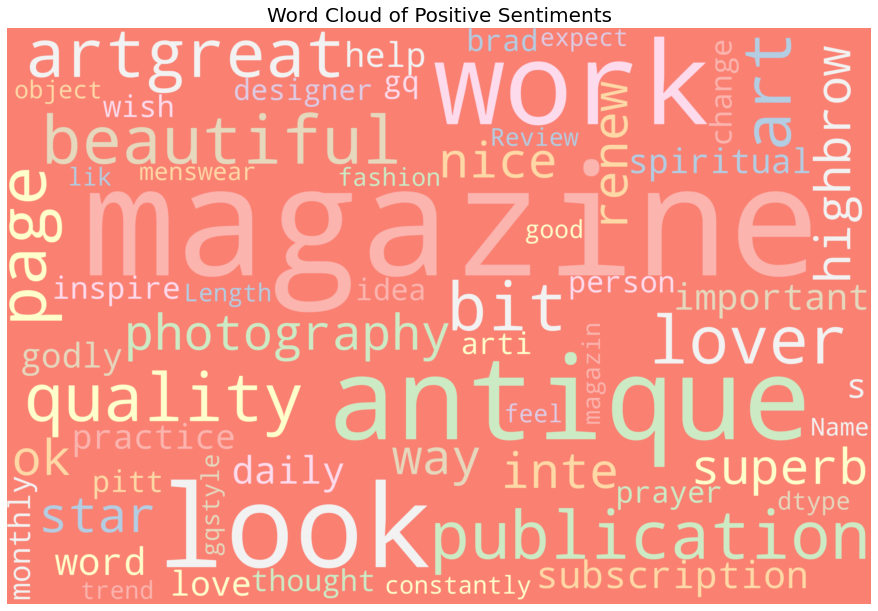

In [110]:
text = magzine_c[(magzine_c["Sentiment"] == 'Positive')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'salmon',
    colormap="Pastel1",
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')#interpolation='bilinear' specifies that the plot should use bilinear interpolation, 
                                                #which is a method for smoothing and resampling the image data to produce a higher-quality plot. 
                                                #This can make the word cloud look more visually appealing and readable.
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Positive Sentiments",fontsize=20)
plt.show()

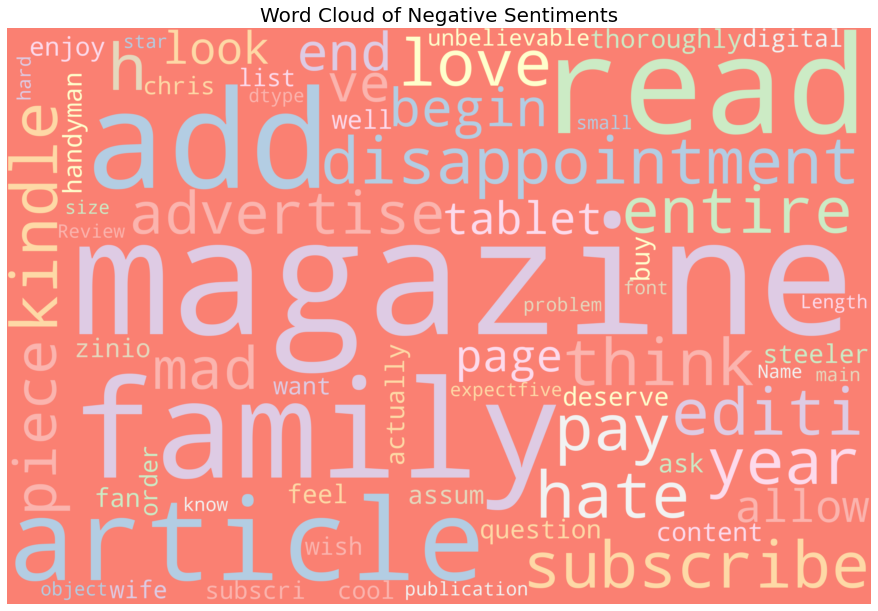

In [111]:
text = magzine_c[(magzine_c["Sentiment"] == 'Negative')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'salmon',
    colormap="Pastel1",
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')#interpolation='bilinear' specifies that the plot should use bilinear interpolation, 
                                                #which is a method for smoothing and resampling the image data to produce a higher-quality plot. 
                                                #This can make the word cloud look more visually appealing and readable.
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Negative Sentiments",fontsize=20)
plt.show()

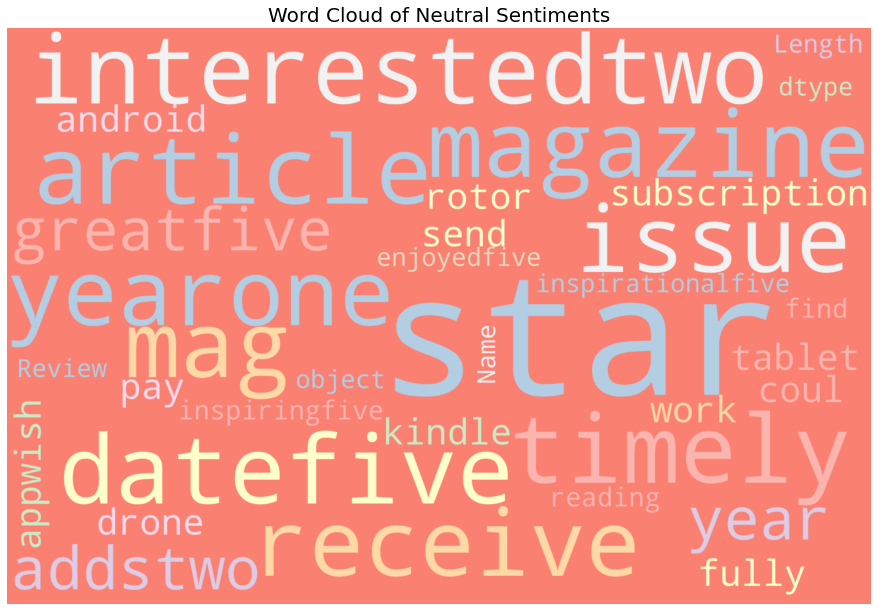

In [112]:
text = magzine_c[(magzine_c["Sentiment"] == 'Neutral')]['Review']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'salmon',
    colormap="Pastel1",
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')#interpolation='bilinear' specifies that the plot should use bilinear interpolation, 
                                                #which is a method for smoothing and resampling the image data to produce a higher-quality plot. 
                                                #This can make the word cloud look more visually appealing and readable.
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud of Neutral Sentiments",fontsize=20)
plt.show()

### Checking sentiment distriution.

<AxesSubplot:ylabel='Sentiment'>

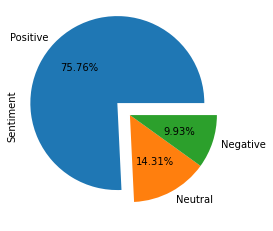

In [113]:
magzine_c['Sentiment'].value_counts().plot(kind='pie',autopct = '%0.2f%%',explode = [0.2,0,0])

#### Here we can observe that our distribution of reviews is not uniform. Hence for furthur classification models F1-Score would be the most appropiate evaluation measure to consider

# Final cleaned data make csv

In [114]:
magzine_c.to_csv('magzine_cleandata11.csv')

In [115]:
import pandas as pd
df=pd.read_csv('magzine_cleandata11.csv')

In [116]:
df.isnull().sum()

Unnamed: 0      0
overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    1
style           0
category        0
title           0
also_buy        0
brand           0
also_view       0
main_cat        0
Review          1
polarity        0
Sentiment       0
dtype: int64

#### Clean Category columns

In [125]:
df[df['category']== '[]'].shape[0]

181

In [126]:
df['category'] = df['category'].apply(lambda x: 'unknown' if x == '[]' else x)


### remove empty list

In [127]:
df[df['category']== '[]'].shape[0]

0

#### Make new csv file

In [128]:
df.to_csv('magzine_cleandata22.csv')

In [130]:
import pandas as pd
df=pd.read_csv('magzine_cleandata22.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,reviewerName,style,category,title,also_buy,brand,also_view,main_cat,Review,polarity,Sentiment
0,0,0,3,False,2007-03-24,A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,antique magazine publication antique lover his...,0.131140,Positive
1,1,2,5,False,2006-11-10,A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,beautiful magazine work art quality page bit i...,0.783333,Positive
2,2,4,5,True,2015-08-23,A2T0GO5G3JJ66V,B00005N7OJ,Helen C. Kuzmier,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,magazine work artgreat photography superb inte...,0.562500,Positive
3,3,6,3,True,2015-03-10,A1CEG4HICKGHUW,B00005N7OJ,Cliffton K. Bryner,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,ok star,0.500000,Positive
4,4,8,3,True,2015-01-04,AJW4UJUSJVKJA,B00005N7OJ,Christine Moran,Format Print Magazine,"['Magazine Subscriptions', 'Home & Garden', 'A...","<span class=""a-size-medium a-color-secondary""","['B0009793AC', 'B0045VPFC8', 'B001THPA44', 'B0...",Brant Publications,"['B0047VIAE6', 'B0000VBS8C', 'B0009793AC', 'B0...",Magazine Subscriptions,nice look way highbrow not renew subscription ...,0.533333,Positive


In [131]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
overall         0
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewerName    1
style           0
category        0
title           0
also_buy        0
brand           0
also_view       0
main_cat        0
Review          1
polarity        0
Sentiment       0
dtype: int64